
# Project: Investigate the TMDb Dataset (Project 1)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is an analysis of The Movie Database (TMDb). This dataset contains 21 columns and 10866 rows. 55 years of  movies from 1960 to 2015 are contained in this dataset. 
> I will be using these analysis to answer the following questions.
> 1. What year generated the highest revenue?
> 2. Which year has the highest release of movies?
> 3. How has movies released changed overtime?
> 4. Which movie generated the highest revenue and the least revenue?
> 5. What 3 movies made the most profit and most loss?
> 6. What year made the most profit?
> 7. Is there any correlation between revenue and runtime, vote_count, popularity, budget?
> 8. What movie genre is the most popular?
> 9. Who is the most popular director?
> 10. What movie is the most popular and the least popular?


> This project will be broken into three steps.They are
>1. Data Wrangling
>2. Data Cleaning
>3. Exploratory Data Analysis or EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading and exploring the dataset
df = pd.read_csv('tmdb-movies.csv')

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# checking the number of rows and columns
df.shape

(10866, 21)

In [4]:
# checking the size of the dataset
df.size

228186

In [5]:
# checking the data types and if there are some missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>### The following columns contain nulls
>- imdb_id
-cast
-homepage
-director
-tagline
-keywords
-overview 
-genres
-production_companies

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning

This is the second step of this project and it will invole;

- Deleting columns that are not required
-Checking and removing duplicates
-Checking and droping null values
-Checking and replacing zero values
-Checking if all columns contain the right data type
-Changing data type format of some columns


####  Deleting columns that are not required

In [7]:
# Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Dropping the "imdb_id" column, so the "id" can be used as the unique identifier
# Dropping production_companies column since it contains a lot of null and I won't be using it
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'revenue_adj', 'budget_adj'], axis=1, inplace=True)

In [9]:
# confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### Checking and removing duplicates

In [10]:
# checking for duplicates in the data
sum(df.duplicated())

1

Found only 1 duplicate in the dataset

In [11]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [12]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

#### Checking and dropping null values

In [13]:
# Checking for missing values in the dataset
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

df.isnull().sum()

In [14]:
#drop the null values
df.dropna(inplace = True)

In [15]:
# Confirming the change
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

#### Checking and replacing zero values
Checking for zero values in the revenue, budget, and runtime columns. If not removed or replaced, it can affect the analysis by leading to misleading insights.

In [16]:
# Checking for zero values in the revenue, budget and runtime columns
zero_values = df.query('revenue== 0 or budget == 0 or runtime == 0').head()

zero_values

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,5.4,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,5.5,2015


The dataset contains rows that has zero values. 

In [17]:
df[['revenue', 'budget', 'runtime']] == 0

,revenue,budget,runtime
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10861,True,True,False
10862,True,True,False
10863,True,True,False
10864,True,True,False


In [18]:
# Replacing the zero values with the average

df["budget"].replace(0, df.budget.mean(), inplace=True)
df["revenue"].replace(0, df.revenue.mean(), inplace=True)
df["runtime"].replace(0, df.runtime.mean(), inplace=True)

In [19]:
# confirm the replacement
df[['revenue', 'budget', 'runtime']] == 0

,revenue,budget,runtime
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10861,False,False,False
10862,False,False,False
10863,False,False,False
10864,False,False,False


In [20]:
# Checking new data shape
df.shape

(10731, 13)

The data set now contains 10731 rows and 13 columns

In [21]:
# Checking new data 
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


#### Checking if all columns contain the right data type

In [22]:
#Checking if all columns contain the right data type
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

The release_data type is a string. It has to be changed to a DateTime format.
The budget, revenue, and runtime columns will be changed from float to int datatype.

#### Changing some columns data type format

In [23]:
# Changing data type format of release_date column
df['release_date'] = pd.to_datetime(df['release_date'])

In [24]:
# Changing data type of other columns from float to int
df['budget'] = df['budget'].astype('int64')

df['revenue'] = df['revenue'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [25]:
# Checking if changes were effected
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [26]:
# Viewing the data
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [27]:
# checking new data shape
df.shape

(10731, 13)

#### The dataset now contains 10731 rows and 13 columns

<a id='eda'></a>
## Exploratory Data Analysis

### Histograms to see the distribution of some columns

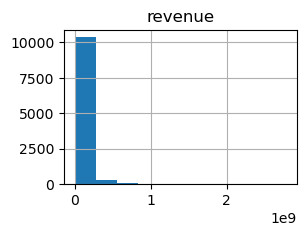

In [28]:
df.hist('revenue', figsize=(3,2));

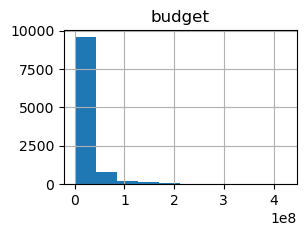

In [29]:
df.hist('budget', figsize=(3,2));

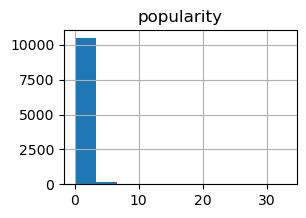

In [30]:
df.hist('popularity', figsize=(3,2));

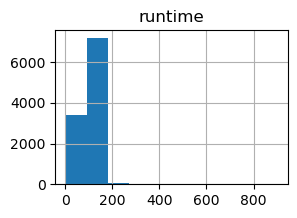

In [31]:
df.hist('runtime', figsize=(3,2));

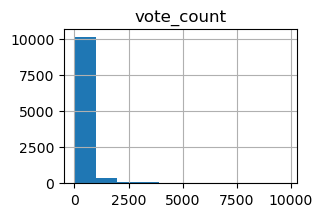

In [32]:
df.hist('vote_count', figsize=(3,2));

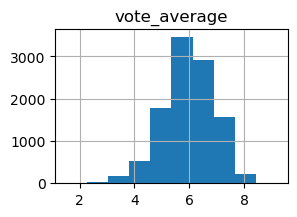

In [33]:
df.hist('vote_average', figsize=(3,2));

## Now answering the questions listed in the introductory part of this notebook

### 1. What year generated the highest revenue?

In [34]:
# getting the top 10 years with the highest revenue
top10_year = df.groupby('release_year').sum()['revenue'].sort_values(ascending=False)[0:10]
print(top10_year)

release_year
2015    42930725205
2014    42675195152
2013    41033187252
2012    39109868257
2011    35428678695
2009    35284133834
2010    32361562391
2008    30750583385
2007    29007795776
2006    24259077011
Name: revenue, dtype: int64


In [35]:
#defining a function to set the visualization labels
def plot_labels(t, x, y):
     plt.title(t)
     plt.xlabel(x, fontsize = 10, fontweight = "bold")
     plt.ylabel(y, fontsize = 10, fontweight = "bold")
     plt.show()

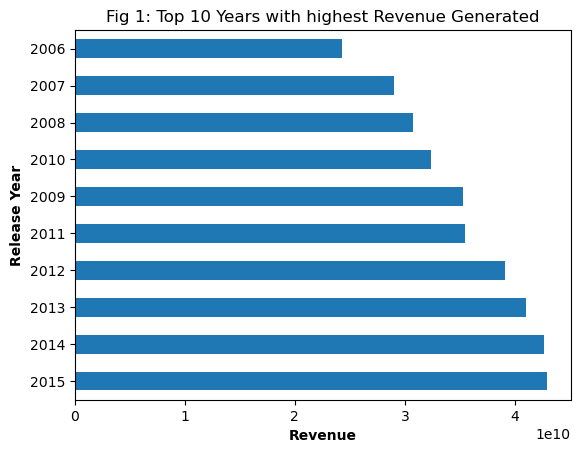

In [36]:
# plotting the top 10 years with the highest revenue
top10_year.plot(kind = 'barh')

plot_labels("Fig 1: Top 10 Years with highest Revenue Generated", 'Revenue', 'Release Year')


As can be seen, the highest revenue of 42930725205 was generated in 2015. 

### 2. Which year has the highest release of movies?

In [37]:
# Find the ount of movies released for each year with groupby
df.groupby('release_year').count()['id']


release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64

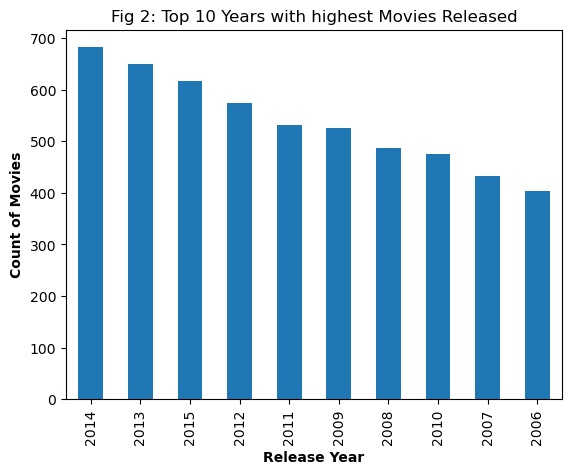

In [38]:
# Find the top 10 count of movies released for each year with groupby
year_top10 = df.groupby('release_year').count()['id'].nlargest(10)

year_top10.plot(kind = 'bar')

plot_labels("Fig 2: Top 10 Years with highest Movies Released", 'Release Year', 'Count of Movies')

In 2014, the highest movie recorded (682) was released.

### 3. How has movies released changed over time?

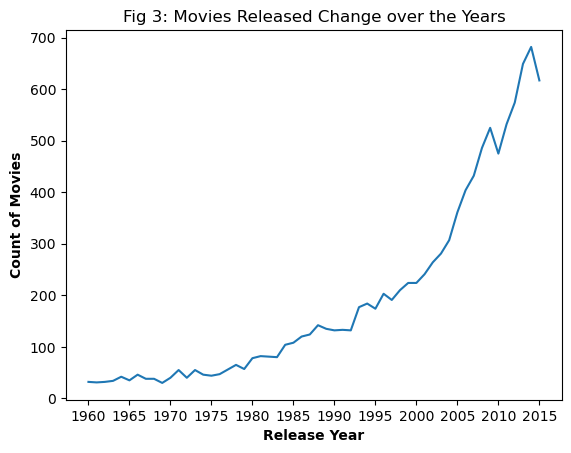

In [39]:
#ploting how count of movies released has changed over the years with a line chart
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

plot_labels("Fig 3: Movies Released Change over the Years", 'Release Year', 'Count of Movies')

The number of released movies have grown significantly from the year 1960 to 2015. However, there was a sharp decline in 2011 with 475 movies produced from 525 released in 2009. It picked up again in 2011 with 532 movies released.

### 4. Which movie generated the highest revenue and the least revenue?

In [40]:
# Movie with highest revenue
df.loc[df['revenue'].idxmax()]

id                                                            19995
popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
Name: 1386, dtype: object

In [41]:
# Movie with the least revenue
df.loc[df['revenue'].idxmin()]

id                                                            13537
popularity                                                 0.462609
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
vote_count                                                       46
vote_average                                                    6.4
release_year                                                   2003
Name: 5067, dtype: object

The movie Avatar has generated the highest revenue while Shattered Glass generated the least revenue. 

### 5. What 3 movies made the most profit and most loss?

In [42]:
# To get profit, budget will be subtracted from revenue
# This will add a new column to the dataset

df['profit'] = df['revenue'] - df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810


In [43]:
# Sorting the data by the profit column
movie_profit = df.sort_values(by=['profit'], inplace=False, ascending=False)

# top 3 most profitable movies
movie_profit.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,1645034188


In [44]:
# top 3 least profitable movies
movie_profit.tail(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
7031,10733,0.94856,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,2004-04-07,60,5.9,2004,-119180039
5508,57201,1.21451,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,2013-07-03,1607,6.0,2013,-165710090
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,-413912431


### 6. Which year generated the highest profit

In [45]:
# getting the top 10 years with the highest profit
top10_year = df.groupby('release_year').sum()['profit'].nlargest(10)
print(top10_year)

release_year
2015    29309093726
2014    28119321723
2013    26206370703
2012    25819848211
2011    22650398959
2009    22607493482
2010    19513800929
2008    19228328350
2007    18255663466
2006    14083284387
Name: profit, dtype: int64


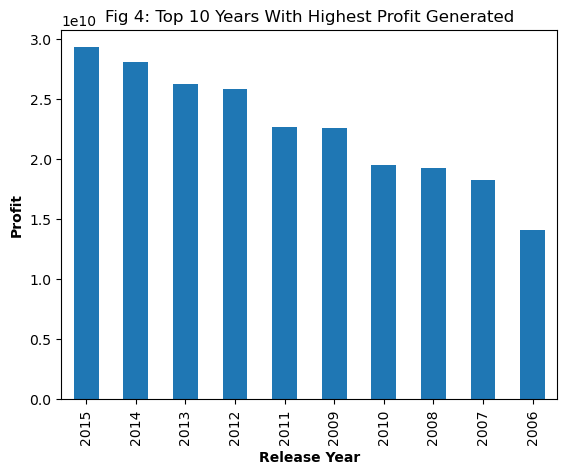

In [46]:
# plotting the top 10 years with the highest profit
top10_year.plot(kind = 'bar')

plot_labels("Fig 4: Top 10 Years With Highest Profit Generated", 'Release Year', 'Profit')

The highest profit was generated in 2015.

### 7. Is there any correlation between revenue and vote_count, runtime, budget, popularity,profit?

In [47]:
# Checking the corr between some columns
def revenue_corr(df, col):
    return df[col].corr()

columns = ['revenue', 'popularity', 'budget', 'runtime', 'vote_count', 'profit']

revenue_corr(df, columns)

,revenue,popularity,budget,runtime,vote_count,profit
revenue,1.000000,0.634746,0.704812,0.144150,0.772467,0.977160
popularity,0.634746,1.000000,0.514733,0.136310,0.800619,0.600071
budget,0.704812,0.514733,1.000000,0.173004,0.614826,0.537965
runtime,0.144150,0.136310,0.173004,1.000000,0.164414,0.119468
vote_count,0.772467,0.800619,0.614826,0.164414,1.000000,0.733740
profit,0.977160,0.600071,0.537965,0.119468,0.733740,1.000000


            vote_count   revenue
vote_count    1.000000  0.772467
revenue       0.772467  1.000000


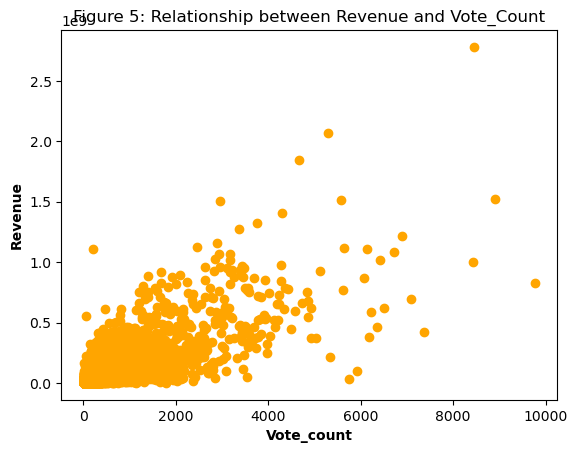

In [48]:
# relationship between revenue and vote_count
print (df[['vote_count','revenue']].corr())

plt.scatter(df['vote_count'], df['revenue'], color='orange')

plot_labels("Figure 5: Relationship between Revenue and Vote_Count", "Vote_count", "Revenue")

There is a significant positive correlation between Revenue and Votecount

         runtime  revenue
runtime  1.00000  0.14415
revenue  0.14415  1.00000


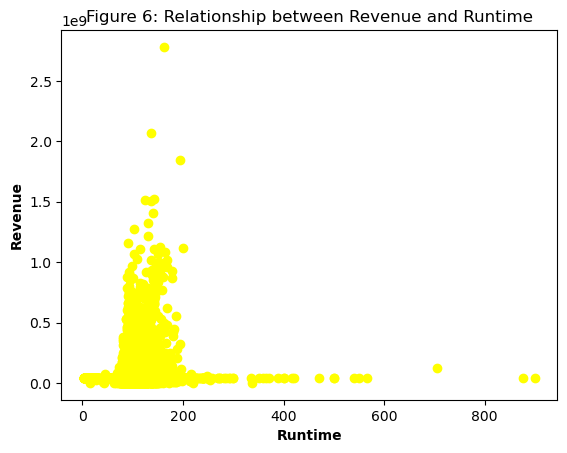

In [49]:
# relationship between revenue and runtime

print (df[['runtime','revenue']].corr())

plt.scatter(df['runtime'], df['revenue'], color='yellow')

plot_labels("Figure 6: Relationship between Revenue and Runtime", "Runtime", "Revenue")

There is a weak positive correlation between Revenue and Runtime

           budget   revenue
budget   1.000000  0.704812
revenue  0.704812  1.000000


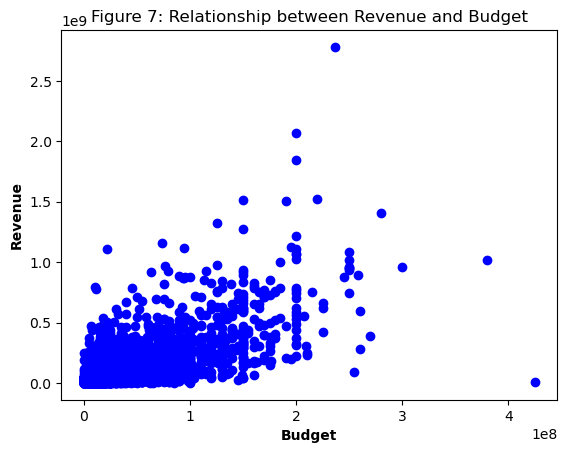

In [50]:
# relationship between revenue and budget

print (df[['budget','revenue']].corr())

plt.scatter(df['budget'], df['revenue'], color='blue')

plot_labels("Figure 7: Relationship between Revenue and Budget", "Budget", "Revenue")

There is significant positive correlation between Revenue and Budget

            popularity   revenue
popularity    1.000000  0.634746
revenue       0.634746  1.000000


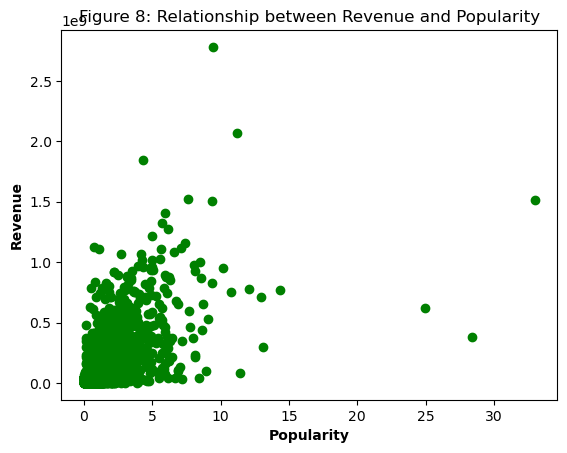

In [51]:
# relationship between revenue and budget
print (df[['popularity','revenue']].corr())

plt.scatter(df['popularity'], df['revenue'], color='green')

plot_labels("Figure 8: Relationship between Revenue and Popularity", "Popularity", "Revenue")
#There is a slight positive correlation

There is a significant positive correlation between Revenue and Popularity

          profit  revenue
profit   1.00000  0.97716
revenue  0.97716  1.00000


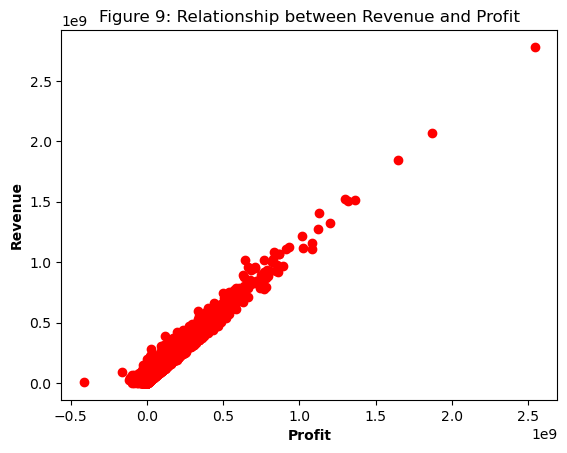

In [52]:
# relationship between revenue and profit
print (df[['profit','revenue']].corr())

plt.scatter(df['profit'], df['revenue'], color='red')

plot_labels("Figure 9: Relationship between Revenue and Profit", "Profit", "Revenue")

There is a strong positive correlation between Revenue and Profit

In [53]:
# Checking the corr between all the columns
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
id,1.000000,-0.009464,-0.098753,-0.065878,-0.074276,-0.032767,-0.071896,0.510385,-0.048701
popularity,-0.009464,1.000000,0.514733,0.634746,0.136310,0.800619,0.217906,0.093044,0.600071
budget,-0.098753,0.514733,1.000000,0.704812,0.173004,0.614826,0.078218,0.131566,0.537965
revenue,-0.065878,0.634746,0.704812,1.000000,0.144150,0.772467,0.155804,0.066650,0.977160
runtime,-0.074276,0.136310,0.173004,0.144150,1.000000,0.164414,0.174847,-0.114677,0.119468
vote_count,-0.032767,0.800619,0.614826,0.772467,0.164414,1.000000,0.260554,0.110317,0.733740
vote_average,-0.071896,0.217906,0.078218,0.155804,0.174847,0.260554,1.000000,-0.127746,0.161710
release_year,0.510385,0.093044,0.131566,0.066650,-0.114677,0.110317,-0.127746,1.000000,0.039788
profit,-0.048701,0.600071,0.537965,0.977160,0.119468,0.733740,0.161710,0.039788,1.000000


### 8. What movie genre is the most popular?

In [54]:
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = True)
genres_count

TV Movie            162
Western             164
Foreign             184
War                 268
History             330
Music               399
Documentary         470
Animation           664
Mystery             808
Fantasy             908
Family             1214
Science Fiction    1221
Crime              1353
Adventure          1465
Horror             1636
Romance            1708
Action             2376
Thriller           2902
Comedy             3775
Drama              4746
dtype: int64

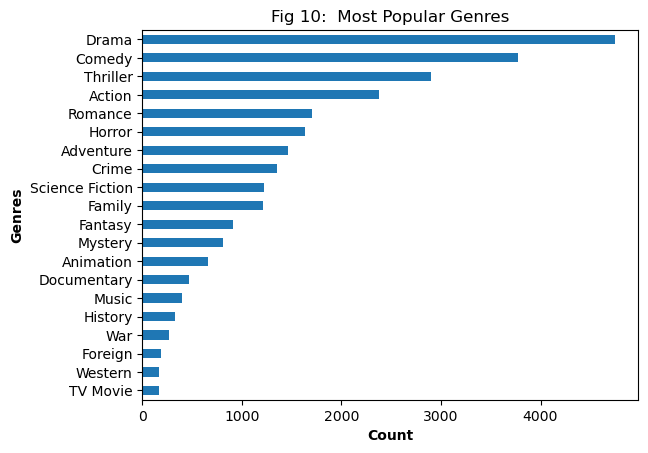

In [55]:
# plotting the viz
genres_count.plot(kind = 'barh')

plot_labels("Fig 10:  Most Popular Genres", 'Count', 'Genres')

The most popular movie genre is Drama, followed by Comedy and Thriller.

### 9. Who are the top three most popular director?

In [56]:
# getting the count of directors
directors_count = pd.Series(df['director'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
Top20_directors = directors_count.head(20)
Top20_directors

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         30
Steven Spielberg        30
Steven Soderbergh       23
Ridley Scott            23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              19
Robert Rodriguez        19
John Carpenter          19
Wes Craven              19
Barry Levinson          19
Francis Ford Coppola    19
David Cronenberg        19
Rob Reiner              18
Mike Nichols            18
Walter Hill             18
John Landis             18
dtype: int64

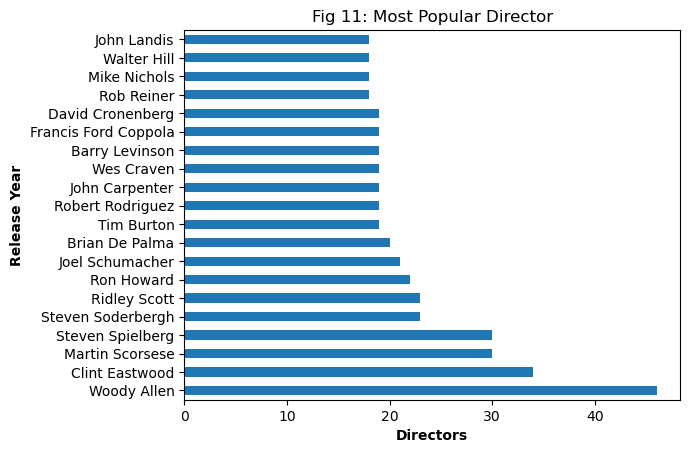

In [57]:
# plotting the viz
Top20_directors.plot(kind = 'barh')

plot_labels("Fig 11: Most Popular Director", 'Directors', 'Release Year')

The three most popular movie directors are Woody Allen who directed 46 movies, Clint Eastwood who directed 34 movies, and Martin Scorsese who directed 30 movies.

In [58]:
# Movie with the highest popularity
df.loc[df['popularity'].idxmax()]

id                                                           135397
popularity                                                32.985763
budget                                                    150000000
revenue                                                  1513528810
original_title                                       Jurassic World
cast              Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                            Colin Trevorrow
runtime                                                         124
genres                    Action|Adventure|Science Fiction|Thriller
release_date                                    2015-06-09 00:00:00
vote_count                                                     5562
vote_average                                                    6.5
release_year                                                   2015
profit                                                   1363528810
Name: 0, dtype: object

In [59]:
# Movie with the least popularity
df.loc[df['popularity'].idxmin()]

id                                                            32082
popularity                                                 0.000188
budget                                                     14803646
revenue                                                    40319887
original_title                                         The Hospital
cast              George C. Scott|Diana Rigg|Richard Dysart|Barn...
director                                              Arthur Hiller
runtime                                                         103
genres                                         Mystery|Comedy|Drama
release_date                                    2071-12-14 00:00:00
vote_count                                                       10
vote_average                                                    6.4
release_year                                                   1971
profit                                                     25516241
Name: 9977, dtype: object

Jurassic World is the most popular movie as it had the highest popularity rate of 32.985763, while The Hospital had the least popularity rate of 0.000188

<a id='conclusions'></a>
## Conclusions


> After analyzing the dataset, I came to the following conclusions based on the questions answered.

> 1. The highest revenue was generated in the year 2015 with a revenue of 42930725205.
> 2. The highest release of movie was in 2014 with 682 movies released.
> 3. The number of released movies have grown significantly from the year 1960 to 2015. However, there was a sharp decline in 2011 with 475 movies produced from 525 released in 2009. It picked up again in 2011 with 532 movies released.
> 4. The movie Avatar has generated the highest revenue while the movie Shattered Glass generated the least revenue. 
> 5. The movies Avatar, Star Wars: The Force Awakens, and Titanic generated the most profit, while the movies The Alamo, The Lone Rangers, and the The Warrior's Way made the most losses respectively. 
> 6. The highest profit was generated in 2015 with a profit of 29309093726. This isn't surprising as the highest revenue was also generated in 2015.
> 7. Scatter plots were used to show the relationship between revenue and runtime, popularity, vote_count, and budget. A significant and positive relationship exists between Revenue and Budget and Vote_count. A slight positive relationship also exist between Revenue and Movie popularity. 
> 8. The most popular movie genre is Drama, followed by Comedy and Thriller.
> 9. The three most popular movie directors are Woody Allen who directed 46 movies, Clint Eastwood who directed 34 movies, and 
Martin Scorsese who directed 30 movies. 
> 10. Jurassic World is the most popular movie as it had the highest popularity rate of 32.985763, while The Hospital had the least popularity rate of 0.000188

## Limitations

Only exploratory statistics was performed. The dataset was limiting as it contained many zero entries which had to be replaced with the columns averages and null values which had to be dropped. Also, the movie Shattered Glass which had the least revenue of 2, shows that there may be some input error as it is not possible for the movie to have generated that revenue.